In [5]:
from qiskit import *
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram


resource_id = "/subscriptions/b1d7f7f8-743f-458e-b3a0-3e09734d716d/resourceGroups/aq-hackathons/providers/Microsoft.Quantum/Workspaces/aq-hackathon-01"

provider = AzureQuantumProvider( 
    resource_id=resource_id,
    location= "East US"
)


In [6]:
pip install azure-quantum

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
print([backend.name() for backend in provider.backends()])

['ionq.qpu', 'ionq.simulator']


In [8]:
#from qiskit import QuantumCircuit, Aer, execute

In [9]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import *
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Parent's and Child's qubits. (Unit1 and Unit2)
    # both are set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Parent's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Parent's-qubit,Children-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Parent's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Parent's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    #Parent sends its qubit to Children
    qc.barrier()
    
    #  apply cx-gate as CNOT(Parent's-qubit,Children'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Parent's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    
    # compare the results with pair (a,b)
backend = provider.get_backend("ionq.simulator")
job = backend.run(qc, shots=100)
job_monitor(job)
result = job.result()

Job Status: job has successfully run


11 --> {'11': 100}


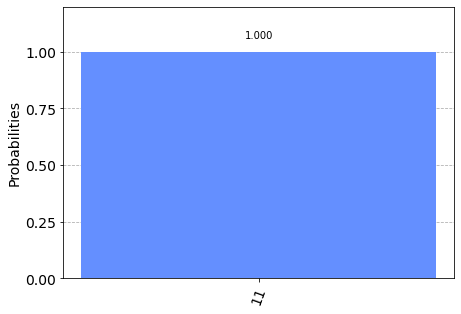

In [11]:
counts = job.result().get_counts(qc)
print(pair,"-->",counts) 
plot_histogram(counts)